## Entrenando la regresion logistica con sklearn

La libreria sklearn puede implementar la regresion logistica para mas de dos clases, usando OvR.

In [6]:
# Preprocesado de datos
# =========================================================
from sklearn import datasets
import numpy as np
datos = datasets.load_iris()
X = datos.data[:, [2,3]]
y = datos.target
print(f'Etiquetas en y: {np.unique(y)}')
print(f'Nombres de las categorias: {datos.target_names}.')

# Division de los datos en train y test
# =========================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Escalamiento de variables
# =========================================================
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Etiquetas en y: [0 1 2]
Nombres de las categorias: ['setosa' 'versicolor' 'virginica'].


In [7]:
# Creando el modelo de regresion logistica
# =========================================================
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [13]:
# Graficando las regiones
# =========================================================
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, X_test, y_test, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if True:
        # plot all samples
        #X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

<IPython.core.display.Javascript object>


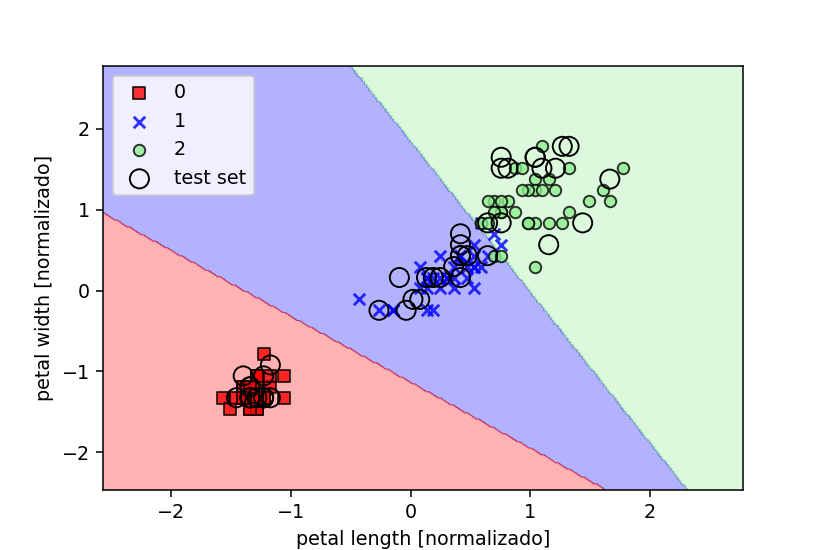

<ipython-input-13-8bdf240baea2>:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


In [14]:
%matplotlib notebook
fig, ax = plt.subplots(figsize = (6, 4))
plot_decision_regions(X_train_std, y_train, lr, X_test_std, y_test)
ax.set_xlabel('petal length [normalizado]')
ax.set_ylabel('petal width [normalizado]')
plt.legend(loc = 'best')

Ahora analizaremos las probabilidades de pertenencia a cada etiqueta de clase. Para ello tomaremos tres filas del conjunto X_test, y evaluaremos con que probabilidad pertenecen a cada clase:

In [28]:
# Primero observemos a que etiquetas de clase son predichas las muestras de flores:
# Etiquetas en y: [0 1 2]
# Nombres de las categorias: ['setosa' 'versicolor' 'virginica'].
print(X_test[:3, :])
lr.predict(X_test_std[:3, :])

[[5.2 2.3]
 [4.9 1.8]
 [4.2 1.3]]


array([2, 2, 1])

In [22]:
# Luego verifiquemos con que probabilidad pertenecen a dichas clases
lr.predict_proba(X_test_std[:3, :])*100

array([[3.15822775e-10, 8.09081042e-02, 9.99190919e+01],
       [1.15062697e-05, 2.51323440e+01, 7.48676444e+01],
       [1.58144470e-02, 9.99290658e+01, 5.51197335e-02]])

In [23]:
# Filtrando un poco obtenemos
lr.predict_proba(X_test_std[:3, :]).argmax(axis = 1)

array([2, 2, 1], dtype=int64)

In [24]:
# Sumando las probabilidades por filas comprobamos que suman 1
lr.predict_proba(X_test_std[:3, :]).sum(axis = 1)

array([1., 1., 1.])

In [29]:
# Verifiquemos la precision del modelo
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_std)
np.round(accuracy_score(y_pred, y_test), 2)

0.98

<span class="burk">EJERCICIO</span>
1. Utilice el archivo `usuarios_win_mac_lin.csv` para determinar segun las columnas `duracion,paginas,acciones,valor`, que representan lo siguiente:
    * Duración de la visita en Segundos
    * Cantidad de Páginas Vistas durante la Sesión
    * Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
    * Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)
    
   Si el usuario maneja Windows, Linux o Mac. Ten en cuenta que las etiquetas son las siquientes:
    * 0 – Windows
    * 1 – Macintosh
    * 2 -Linux

In [244]:
import pandas as pd
df = pd.read_csv('usuarios_win_mac_lin.csv', dtype = str)
df.describe()

,duracion,paginas,acciones,valor,clase
count,170,170,170,170,170
unique,88,8,26,43,3
top,12,1,6,24,0
freq,31,80,26,16,86


In [245]:
def reemplazo(row):
    row['duracion'] = row['duracion'].replace('.', '')
    return row
df.apply(reemplazo, axis = 1)
df2 = df.astype(int)

In [246]:
df = df.astype(int)

In [89]:
df.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [250]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [251]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [213]:
lr = LogisticRegression(C = 10000)
lr.fit(X_train_std, y_train)

LogisticRegression(C=10000)

In [153]:
lr.coef_

array([[ 0.01258997, -0.01408164,  0.12583064,  0.07522672],
       [-0.01373228,  0.00167434, -0.01805599,  0.05872087],
       [ 0.00114231,  0.01240729, -0.10777465, -0.13394759]])

In [154]:
lr.predict_proba(X_test_std)

array([[0.56063765, 0.22645076, 0.21291159],
       [0.49540856, 0.23586745, 0.26872399],
       [0.45057731, 0.24075474, 0.30866795],
       [0.46285392, 0.23915574, 0.29799033],
       [0.47061627, 0.24214448, 0.28723925],
       [0.50739912, 0.24568551, 0.24691537],
       [0.5035325 , 0.23794476, 0.25852274],
       [0.45126179, 0.24099568, 0.30774253],
       [0.46063673, 0.24151328, 0.29785   ],
       [0.48889478, 0.23923147, 0.27187374],
       [0.77692631, 0.14550285, 0.07757084],
       [0.57593782, 0.22281495, 0.20124724],
       [0.48557227, 0.23981844, 0.27460929],
       [0.48472384, 0.24092177, 0.27435438],
       [0.51489584, 0.24349334, 0.24161082],
       [0.52904647, 0.223811  , 0.24714253],
       [0.45455521, 0.24106961, 0.30437517],
       [0.45673415, 0.23995866, 0.3033072 ],
       [0.6722892 , 0.21680863, 0.11090216],
       [0.49267023, 0.24057174, 0.26675803],
       [0.50916547, 0.2430365 , 0.24779803],
       [0.49408858, 0.24430035, 0.26161107],
       [0.

In [214]:
lr.predict(X_test_std)

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2])

In [216]:
accuracy_score(y_train, lr.predict(X_train_std))

0.7647058823529411

In [215]:
accuracy_score(y_test, lr.predict(X_test_std))

0.8235294117647058

<IPython.core.display.Javascript object>


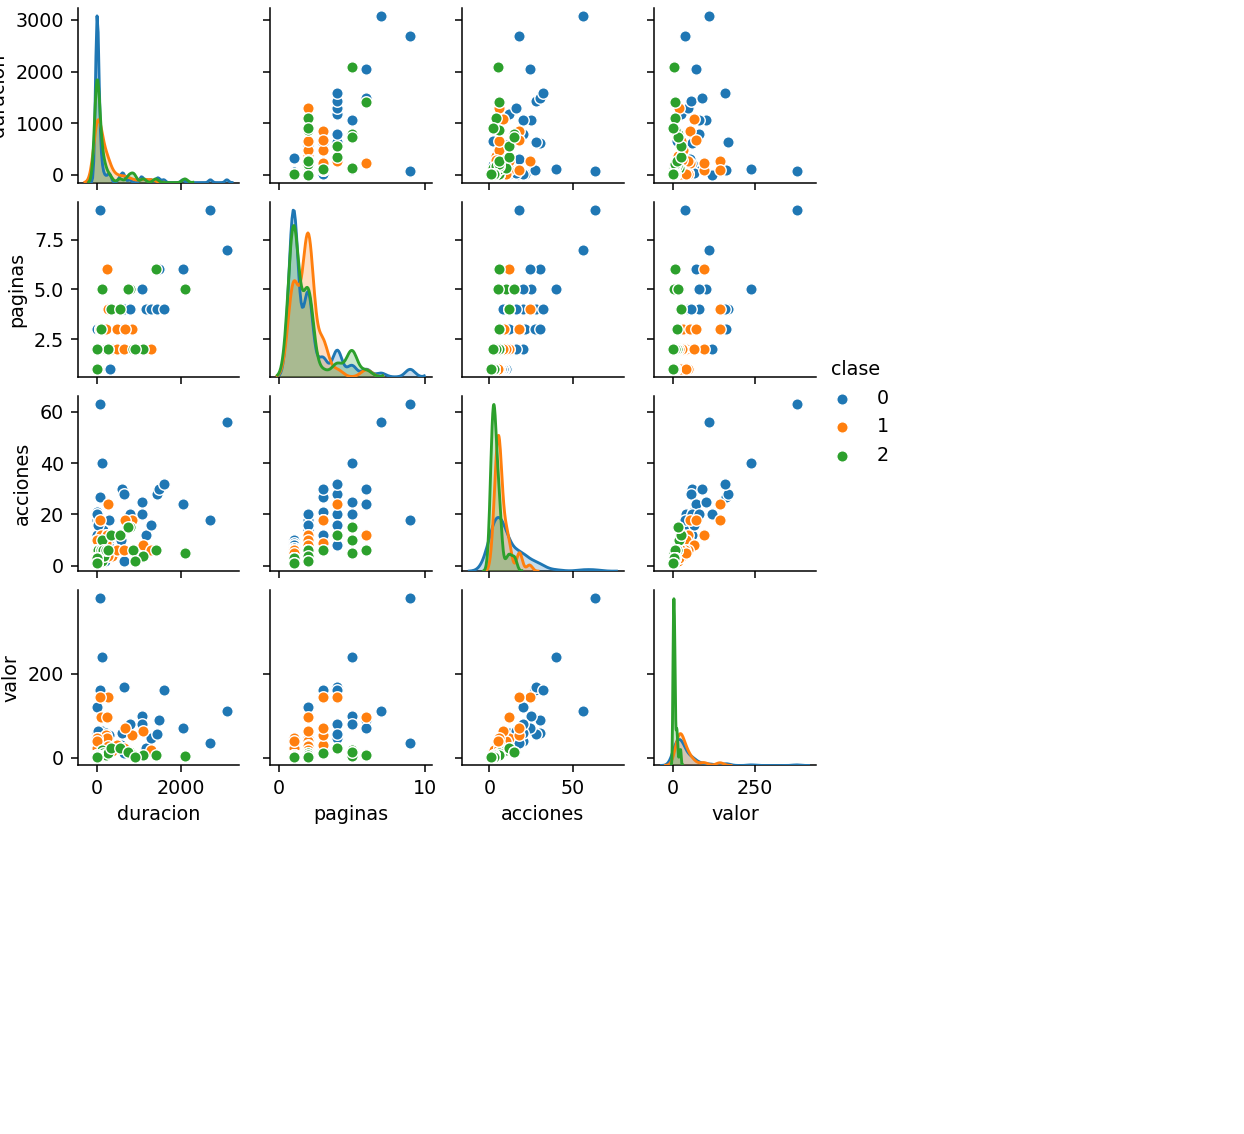

In [157]:
import seaborn as sns
sns.pairplot(df, hue = 'clase', height = 1.5)

## Abordar el sobreajuste con la regularizacion

Algunos de los problemas mas usuales que se suelen encontrar al elaborar modelos de clasificacion y regresion son los conocidos **sobreajuste : overfitting** y **subajuste : underfitting**.

El <span class="mark">sobreajuste</span> significa  simplemente que nuestro modelo se ajusta demasiado bien a los datos de entrenamiento, dando rendimiento muy altos, pero sufre al ajustarse a los datos de test; en el fondo lo que implica es que nuestro modelo es demasiado complejo, y por lo tanto tiene demasiados parametros. Esto generalmente se puede observar cuando el rendimiento en el conjunto de entrenamiento es muy superior que en el conjunto de test.

Es importante recordar que el overfitting implica que el modelo tiene alta varianza:

**Overfitting $\to$ Alta varianza**

El <span class="mark">subajuste</span> significa simplemente que nuestro modelo no se ajusta bien a los datos de entrenamiento, y por ende a los de test. Esto significa que nuestro modelo es muy simple y por lo tanto tienen muy pocos parametros. Esto se puede observar cuando el rendimiento es bajo en los datos de entrenamiento.

Es importante recordar que el underfitting implica que el modelo tiene alto sesgo:

**Underfitting $\to$ Alto sesgo**

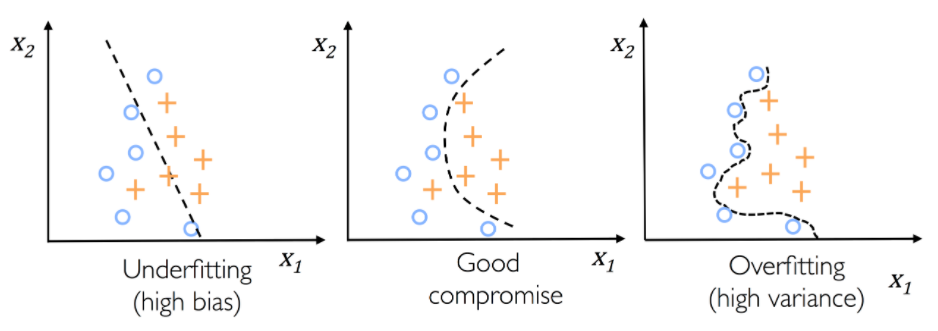

**Varianza**: Esta mide la consistencia (o variabilidad) de la prediccion del modelo para una instancia de muestra en particular en el caso de tener que entrenar el modelo varias veces, por ejemplo en diferentes subconjuntos de datos de entrenamiento. Podemos decir que _el modelo es sensible a la aleatoriedad en los datos de entrenamiento_ .

**Sesgo**: Mide como estarian de lejos las predicciones de los valores correctos si volvieramos a crear el modelo varias veces en distintos conjuntos de datos de entrenamiento; _el sesgo es la medida del error sistematico que no procede de la aleatoriedad_ .

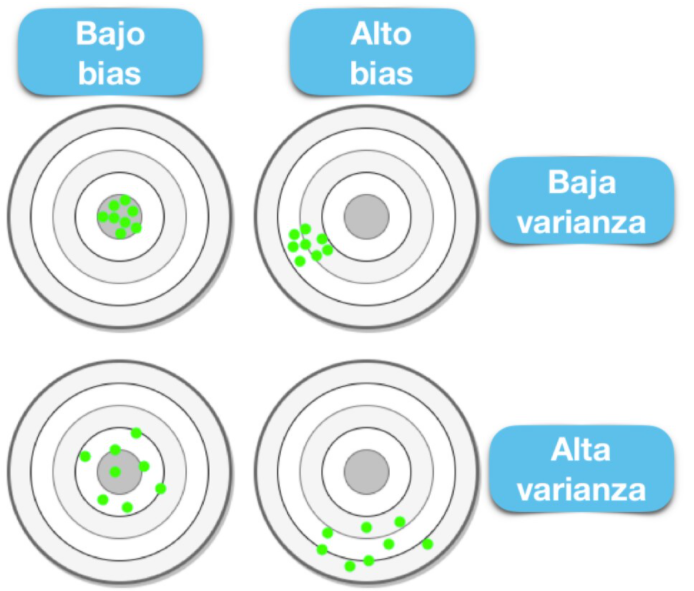

Mas sobre este tema en: https://www.analyticslane.com/2019/05/24/los-conceptos-de-sesgo-y-varianza-en-aprendizaje-automaticos/

Como se puede entender, la idea es poder encontrar un equilibrio entre los dos extremos (underfitting y overfitting); la herramienta que se utiliza para hallar ese equilibrio se conoce como **regularizacion** . La que veremos aqui se conoce como **regularizacion L2** , pero mas adelante veremos otras.

Dentro de las ventajas de la regularizacion tenemos que:

1. La regularizacion es muy util para manejar la colinealidad (alta correlacion entre las caracteristicas).
2. Filtrar el ruido de los datos.
3. Prevenir el sobreajuste.

Lo que hay detras del proceso de regularizacion es la introduccion de un hiperparametro que multiplique a los pesos, y que de esta manera los penalice y los lleve a cero si estos son demasiado grandes, simplificando asi el modelo. Con esta herramienta, se pueden originar modelos mas complejos que luego seran simplificados por la penalizacion introducida. La regularizacion se puede escribir como:

$$\frac{\lambda}{2}||\textbf{w}||^2 = \frac{\lambda}{2}\sum_{j=1}^n w_j^2$$

**Es importante recordar que si se va a utilizar la regularizacion, es obligatorio la normalizacion de las caracteristicas, pues es importante que estas sean comparables.**

La funcion de costo para la regresion logistica, una vez agregada la regularizacion es:

$$J(\textbf{w})=\sum_{i=1}^n \big [-y^{(i)}\log(\phi(z^{(i)}))-(1-y^{(i)})\log(1-\phi(z^{(i)})) \big] + \frac{\lambda}{2}||\textbf{w}||^2$$

Entiendase que

$$||\textbf{w}||^2 = w_0^2+w_1^2+w_2^2+\dots+w_n^2$$

Si aumenta el valor del hiperparametro $\lambda$, aumentamos la fuerza de la regularizacion es decir, pondremos una penalidad mas estricta.

El parametro $C$ de la regresion logistica es el inverso del parametro $\lambda$, por lo tanto entre mas pequeño sea $C$, mas grande sera la penalizacion.

In [217]:
datos = datasets.load_iris()
X = datos.data[:, [2, 3]]
y = datos.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
sc.fit(X_train)
X_train_std = sc.transform(X_train)

In [223]:
datos.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[[-4.56415218e-04 -4.36331007e-04]
 [ 1.01670000e-04  5.34041228e-05]
 [ 3.54745218e-04  3.82926884e-04]]
[[-0.0045367  -0.00433589]
 [ 0.00101188  0.0005293 ]
 [ 0.00352482  0.00380659]]
[[-0.04279415 -0.04079074]
 [ 0.00965743  0.00483935]
 [ 0.03313671  0.0359514 ]]
[[-0.28170456 -0.26320019]
 [ 0.06722777  0.02132152]
 [ 0.21447678  0.24187867]]
[[-0.9536221  -0.84903681]
 [ 0.21934993 -0.0807552 ]
 [ 0.73427217  0.92979202]]
[[-2.30641751 -2.0361802 ]
 [ 0.23176496 -0.41264914]
 [ 2.07465255  2.44882935]]
[[-4.32419083 -3.81134256]
 [-0.41649012 -0.60970102]
 [ 4.74068095  4.42104358]]
[[-6.74838687 -5.81332025]
 [-1.11905093 -0.64327282]
 [ 7.8674378   6.45659307]]
[[-8.78052307 -7.47214464]
 [-0.78338287 -0.18068423]
 [ 9.56390593  7.65282887]]
[[-10.70320683  -9.0180279 ]
 [  0.07799235   0.53879885]
 [ 10.62521448   8.47922906]]
[[-12.67381522 -10.67570423]
 [  1.05196248   1.36151321]
 [ 11.62185275   9.31419102]]


<IPython.core.display.Javascript object>


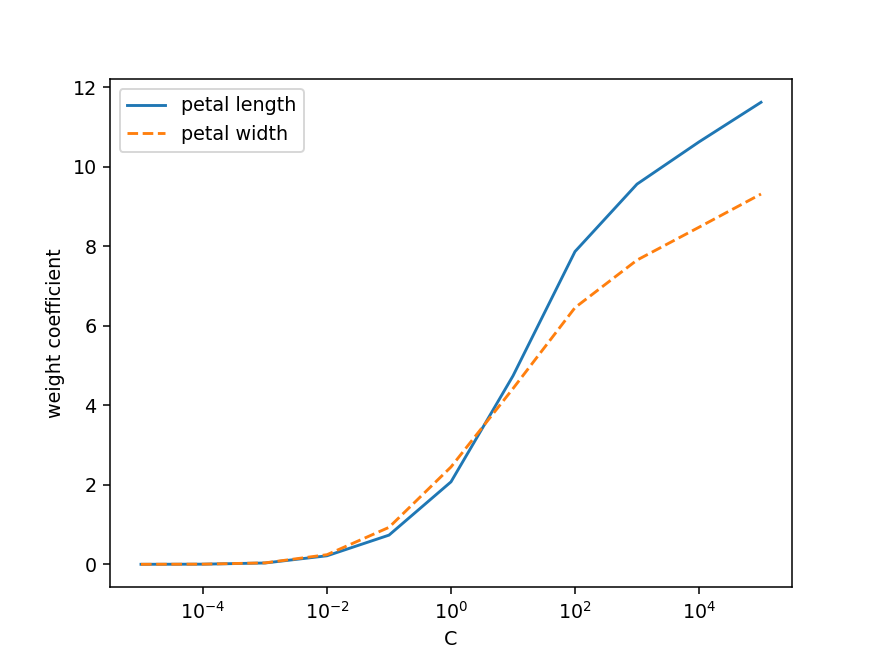

array([[3.54745218e-04, 3.82926884e-04],
       [3.52481895e-03, 3.80658986e-03],
       [3.31367147e-02, 3.59513986e-02],
       [2.14476785e-01, 2.41878670e-01],
       [7.34272169e-01, 9.29792019e-01],
       [2.07465255e+00, 2.44882935e+00],
       [4.74068095e+00, 4.42104358e+00],
       [7.86743780e+00, 6.45659307e+00],
       [9.56390593e+00, 7.65282887e+00],
       [1.06252145e+01, 8.47922906e+00],
       [1.16218527e+01, 9.31419102e+00]])

In [226]:
weights, params = [], []
for c in np.arange(-5, 6):

    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    print(lr.coef_)
    weights.append(lr.coef_[2])
    params.append(10.**c)

weights = np.array(weights)

fig, ax = plt.subplots()
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='best')
plt.xscale('log');
weights

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

1. Desde el ejercicio anterior, determine cual podria ser el mejor parametro de regularizacion C. Para ello realice varias veces la construccion del modelo, y evalue la precision en cada ejecucion. Los valores C a utilizar son
            
            C = [0.1, 1, 10, 100, 1000]

In [252]:
C = np.arange(1, 50, 1)
for i in C:
    lr = LogisticRegression(C = i).fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    a = accuracy_score(y_test, y_pred)
    print(f'C: {i}, precision: {a}.')
    

C: 1, precision: 0.5686274509803921.
C: 2, precision: 0.5882352941176471.
C: 3, precision: 0.6274509803921569.
C: 4, precision: 0.6274509803921569.
C: 5, precision: 0.6274509803921569.
C: 6, precision: 0.6274509803921569.
C: 7, precision: 0.5882352941176471.
C: 8, precision: 0.5882352941176471.
C: 9, precision: 0.6078431372549019.
C: 10, precision: 0.6078431372549019.
C: 11, precision: 0.6078431372549019.
C: 12, precision: 0.5686274509803921.
C: 13, precision: 0.5686274509803921.
C: 14, precision: 0.5686274509803921.
C: 15, precision: 0.5686274509803921.
C: 16, precision: 0.5686274509803921.
C: 17, precision: 0.5686274509803921.
C: 18, precision: 0.5686274509803921.
C: 19, precision: 0.5490196078431373.
C: 20, precision: 0.5490196078431373.
C: 21, precision: 0.5490196078431373.
C: 22, precision: 0.5490196078431373.
C: 23, precision: 0.5490196078431373.
C: 24, precision: 0.5490196078431373.
C: 25, precision: 0.5490196078431373.
C: 26, precision: 0.5490196078431373.
C: 27, precision: 0.5